In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

CITY_DIM = 51

# load locations
with open("../eil51.txt") as f:
    locations = f.read()

locations = tuple(
    tuple(map(int, loc.split(" ")[1:])) for loc in locations.strip().split("\n")
)


def load_city_path(file_path) -> list:
    with open(file_path) as f:
        path = f.read()
    path = list(map(int, path.strip().split("\n")))
    return path


def display_city_location():
    for i, loc in enumerate(locations):
        x, y = loc
        plt.scatter(x, y, marker="x", c="k")
        plt.text(x, y, str(i), size=12, zorder=127)


def display_path(path):
    if max(path) == CITY_DIM:
        path = [pi - 1 for pi in path]

    for i in range(CITY_DIM):
        c1 = locations[path[i]]
        if i == CITY_DIM - 1:
            c2 = locations[path[0]]
        else:
            c2 = locations[path[i + 1]]

        xarr, yarr = zip(*(c1, c2))
        plt.plot(xarr, yarr, c="b")

    c1, c2 = locations[path[0]], locations[path[1]]
    plt.arrow(
        c1[0],
        c1[1],
        c2[0] - c1[0],
        c2[1] - c1[1],
        width=0.5,
        head_width=2,
        color="r",
        zorder=63,
    )


def display_graph(path, file_name):
    if max(path) == CITY_DIM:
        path = [pi - 1 for pi in path]

    plt.figure(figsize=(12, 12))
    plt.xlim(-5, 75)
    plt.ylim(-5, 75)

    for i in range(CITY_DIM):
        c1 = locations[path[i]]
        if i == CITY_DIM - 1:
            c2 = locations[path[0]]
        else:
            c2 = locations[path[i + 1]]

        xarr, yarr = zip(*(c1, c2))
        plt.plot(xarr, yarr, c="b")

    display_city_location()

    c1, c2 = locations[path[0]], locations[path[1]]
    plt.arrow(
        c1[0],
        c1[1],
        c2[0] - c1[0],
        c2[1] - c1[1],
        width=0.5,
        head_width=2,
        color="r",
        zorder=63,
    )
    plt.savefig(file_name, dpi=300)
    plt.show()

def get_path_length(path) -> float:

    # sum
    s = 0

    if max(path) == CITY_DIM:
        path = [pi - 1 for pi in path]

    for i in range(CITY_DIM):
        c1 = locations[path[i]]
        if i == CITY_DIM - 1:
            c2 = locations[path[0]]
        else:
            c2 = locations[path[i + 1]]

        s += ((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2) ** 0.5
    return s

def get_path_length_i(path) -> int:

    # sum
    s = 0

    if max(path) == CITY_DIM:
        path = [pi - 1 for pi in path]

    for i in range(CITY_DIM):
        c1 = locations[path[i]]
        if i == CITY_DIM - 1:
            c2 = locations[path[0]]
        else:
            c2 = locations[path[i + 1]]

        s += np.round(((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2) ** 0.5)
    return s

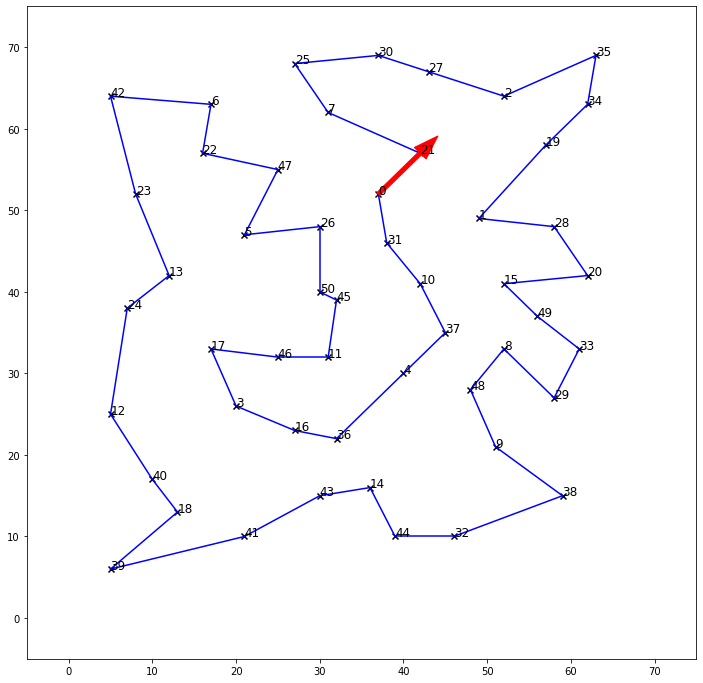

426.0
429.98331198338406


In [17]:
path_opt = load_city_path("path/path_opt.txt")
display_graph(path_opt, "opt.jpg")
print(get_path_length_i(path_opt))
print(get_path_length(path_opt))

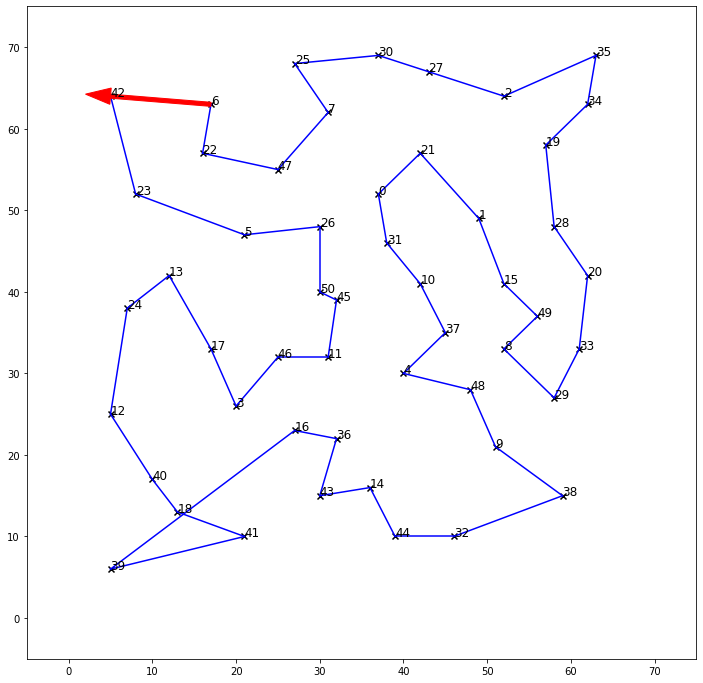

443.37832491865873

In [18]:
path_443 = load_city_path("./path/path_443.txt")
display_graph(path_443, "443.jpg")
get_path_length(path_443)